# viz analysis of Average Annual Daily Traffic 2010 in IL

## Import dataset

This dataset is from https://data.illinois.gov/dataset/f56a972b-359c-493d-9df7-4f70b71b548a/resource/722b02ef-34fa-4eab-844c-77fc4d9f188c/download/idot_average_annual_daily_traffic_2010.csv.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import folium

traf_data = pd.read_csv("https://data.illinois.gov/dataset/f56a972b-359c-493d-9df7-4f70b71b548a/resource/722b02ef-34fa-4eab-844c-77fc4d9f188c/download/idot_average_annual_daily_traffic_2010.csv",
                       na_values={"AADT":["Not Counted"],"SU_VOL":["Not Counted"], "MU_VOL":["Not Counted"],"HCV":["Not Counted"],
                                 "AADT_YR":[" "],"HCV_MU_YR":[" "]})
# or we could also delete the rows with "Not Counted" and " "
# traf_data = traf_data.fillna({"AADT":"Not Counted"})
traf_data

,AADT,AADT_YR,MARKED_NAM,ROAD_NAME,COUNTY_NAM,HCV,HCV_MU_YR,MU_VOL,SU_VOL,MR_NUMBER,MR_TYPE,INVENTORY,KEY_RT_NBR,POINT_X,POINT_Y
0,10.0,2000.0,0,MAIN PUMP STATION RD,ADAMS,NaN,NaN,NaN,NaN,0,0.0,001 01000 004780,1000,-91.4149,39.90845
1,375.0,2008.0,0,WEISS LN,ADAMS,NaN,NaN,NaN,NaN,0,0.0,001 01840 004780,1840,-91.3848,39.97238
2,450.0,2008.0,0,WEISS LN,ADAMS,NaN,NaN,NaN,NaN,0,0.0,001 01840 004780,1840,-91.3812,39.97237
3,NaN,NaN,0,MORTON DR,ADAMS,NaN,NaN,NaN,NaN,0,0.0,001 01844 004780,1844,-91.4101,39.96958
4,NaN,NaN,0,MAR LA DR,ADAMS,NaN,NaN,NaN,NaN,0,0.0,001 01847 004780,1847,-91.3836,39.97117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219235,NaN,NaN,0,,WOODFORD,NaN,NaN,NaN,NaN,0,0.0,102 79203 000000,9203,-89.2060,40.79980
219236,75.0,2010.0,0,,WOODFORD,NaN,NaN,NaN,NaN,0,0.0,102 80001 000000,1,-89.4481,40.87900
219237,5000.0,2009.0,0,,WOODFORD,NaN,NaN,NaN,NaN,0,0.0,102 80002 000000,2,-89.2748,40.62167
219238,1850.0,2010.0,0,,WOODFORD,NaN,NaN,NaN,NaN,0,0.0,102 80002 000000,2,-89.2748,40.62031


## Intro of Dataset

### Additional Information

* The "IDOT Average Annual Daily Traffic 2010" dataset is from data.illinois.gov(https://data.illinois.gov/dataset/357idot_average_annual_daily_traffic_2010).

* We could directly access it by entering "https://data.illinois.gov/dataset/f56a972b-359c-493d-9df7-4f70b71b548a/resource/722b02ef-34fa-4eab-844c-77fc4d9f188c/download/idot_average_annual_daily_traffic_2010.csv".

* The "IDOT Average Annual Daily Traffic 2010" dataset did **not provide any LICENSE**. Since it is a public dataset from the government, I think that basic analysis and data visualization can be performed on this data set.

* The file is about 25,000kb, which contains 219,240 rows and 15 columns.

### Intro about backgroud & datatype

* "This coverage contains a highway Annual Average Daily Traffic (AADT) subset of the information included in the IDOT Illinois Highway Information System (IHIS) -- Illinois Roadway Information System (IRIS)."
* It includes 15 attributes, among which "AADT_YR", "POINT_X", "POINT_Y", "KEY_RT_NBR", "MR_TYPE", "MR_NUMBER", "HCV_MU_YR" are numeric variables; "AADT", "SU_VOL", "MU_VOL" ,"HCV" contains "Not Counted", you can treat "Not Counted" as a null value, so "AADT", "SU_VOL", "MU_VOL", "HCV" become numeric variables; "MARKED_NAM", "ROAD_NAME", "COUNTY_NAM", "INVENTORY" are categorical variables;
* Each rows represents the annual average daily traffic with specific Annual Average Daily Traffic Year, MARKED_NAM & ROAD_NAME.

### Explanation of variables

**Because there is no official attribute description file, I searched google for the usual meaning of these tags.**
(from https://apps.dot.illinois.gov/gist2/gisdata/hwy_metadat.txt)


AADT (Annual Average Daily Traffic): Average daily traffic on a roadway link for all days of the week during a period of one year, expressed in vpd (vehicles per day).

AADT_YR: Annual Average Daily Traffic Year 

MARKED_NAM: The name of maked point.

ROAD_NAME: Street/Road Name 

COUNTY_NAM: Translated from INV_CO

HCV: Annual Average Daily Heavy Commercial Volume 

HCV_MU_YR: Annual Average Daily HCV/Multi Unit Volume Year

MU_VOL: Annual Average Daily Multiple Unit Volume

SU_VOL: Annual Average Daily Single Unit Volume

MR_NUMBER: (cannot found)

MR_TYPE: (cannot found)

INVENTORY: INVENTORY KEY ROUTE NUMBER

KEY_RT_NBR: Key Route Number

POINT_X: Longitude of record point

POINT_Y: Latitude of record point


In [2]:
traf_data.isnull().sum()

AADT          114865
AADT_YR       114865
MARKED_NAM         0
ROAD_NAME          3
COUNTY_NAM         0
HCV           207971
HCV_MU_YR     207971
MU_VOL        207971
SU_VOL        207971
MR_NUMBER          0
MR_TYPE        11482
INVENTORY          0
KEY_RT_NBR         0
POINT_X            0
POINT_Y            0
dtype: int64

In [3]:
traf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219240 entries, 0 to 219239
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   AADT        104375 non-null  float64
 1   AADT_YR     104375 non-null  float64
 2   MARKED_NAM  219240 non-null  object 
 3   ROAD_NAME   219237 non-null  object 
 4   COUNTY_NAM  219240 non-null  object 
 5   HCV         11269 non-null   float64
 6   HCV_MU_YR   11269 non-null   float64
 7   MU_VOL      11269 non-null   float64
 8   SU_VOL      11269 non-null   float64
 9   MR_NUMBER   219240 non-null  int64  
 10  MR_TYPE     207758 non-null  float64
 11  INVENTORY   219240 non-null  object 
 12  KEY_RT_NBR  219240 non-null  int64  
 13  POINT_X     219240 non-null  float64
 14  POINT_Y     219240 non-null  float64
dtypes: float64(9), int64(2), object(4)
memory usage: 25.1+ MB


In [4]:
traf_data.describe()

,AADT,AADT_YR,HCV,HCV_MU_YR,MU_VOL,SU_VOL,MR_NUMBER,MR_TYPE,KEY_RT_NBR,POINT_X,POINT_Y
count,104375.000000,104375.000000,11269.000000,11269.000000,11269.000000,11269.000000,219240.000000,207758.0,219240.000000,219240.000000,219240.000000
mean,3811.882204,2007.381068,1471.424794,2008.961310,906.133286,565.291508,3.962949,0.0,2316.175283,-89.012599,40.303486
std,16263.809071,2.315434,3105.078248,0.365237,2323.655821,930.235790,22.313463,0.0,2734.738937,0.929282,1.446963
min,10.000000,2000.000000,10.000000,2006.000000,0.000000,0.000000,0.000000,0.0,1.000000,-91.505900,36.983650
25%,100.000000,2006.000000,265.000000,2009.000000,100.000000,125.000000,0.000000,0.0,223.000000,-89.697700,39.004047
50%,450.000000,2008.000000,500.000000,2009.000000,200.000000,250.000000,0.000000,0.0,1025.000000,-88.962000,40.357945
75%,2250.000000,2009.000000,975.000000,2009.000000,450.000000,550.000000,0.000000,0.0,3669.250000,-88.187200,41.671675
max,353400.000000,2010.000000,41800.000000,2010.000000,36000.000000,15500.000000,474.000000,0.0,9999.000000,-87.504000,42.507770


## Explore the dataset

This data set contains AADT for the highways in 102 counties of Illinois.

In [5]:
print(traf_data["COUNTY_NAM"].unique())

print(traf_data["COUNTY_NAM"].unique().size)

['ADAMS' 'ALEXANDER' 'BOND' 'BOONE' 'BROWN' 'BUREAU' 'CALHOUN' 'CARROLL'
 'CASS' 'CHAMPAIGN' 'CHRISTIAN' 'CLARK' 'CLAY' 'CLINTON' 'COLES' 'COOK'
 'CRAWFORD' 'CUMBERLAND' 'DEKALB' 'DEWITT' 'DOUGLAS' 'DUPAGE' 'KANE'
 'EDGAR' 'EDWARDS' 'EFFINGHAM' 'FAYETTE' 'FORD' 'FRANKLIN' 'FULTON'
 'GALLATIN' 'GREENE' 'GRUNDY' 'HAMILTON' 'HANCOCK' 'HARDIN' 'HENDERSON'
 'HENRY' 'IROQUOIS' 'JACKSON' 'JASPER' 'JEFFERSON' 'JERSEY' 'JO DAVIESS'
 'JOHNSON' 'KANKAKEE' 'KENDALL' 'KNOX' 'LAKE' 'LASALLE' 'LAWRENCE' 'LEE'
 'LIVINGSTON' 'LOGAN' 'MCDONOUGH' 'MCHENRY' 'MCLEAN' 'MACON' 'MACOUPIN'
 'MADISON' 'MARION' 'MARSHALL' 'MASON' 'MASSAC' 'MENARD' 'MERCER' 'MONROE'
 'MONTGOMERY' 'MORGAN' 'MOULTRIE' 'OGLE' 'PEORIA' 'PERRY' 'PIATT' 'PIKE'
 'POPE' 'PULASKI' 'PUTNAM' 'RANDOLPH' 'RICHLAND' 'ROCK ISLAND' 'ST. CLAIR'
 'SALINE' 'SANGAMON' 'SCHUYLER' 'SCOTT' 'SHELBY' 'STARK' 'STEPHENSON'
 'TAZEWELL' 'UNION' 'VERMILION' 'WABASH' 'WARREN' 'WASHINGTON' 'WAYNE'
 'WHITE' 'WHITESIDE' 'WILL' 'WILLIAMSON' 'WINNEBAGO' 'WOODFORD']

We aggregate the data according to county and calculate the average value of AADT. It can be found that the average AADT of some counties is very high.

<AxesSubplot:xlabel='COUNTY_NAM'>

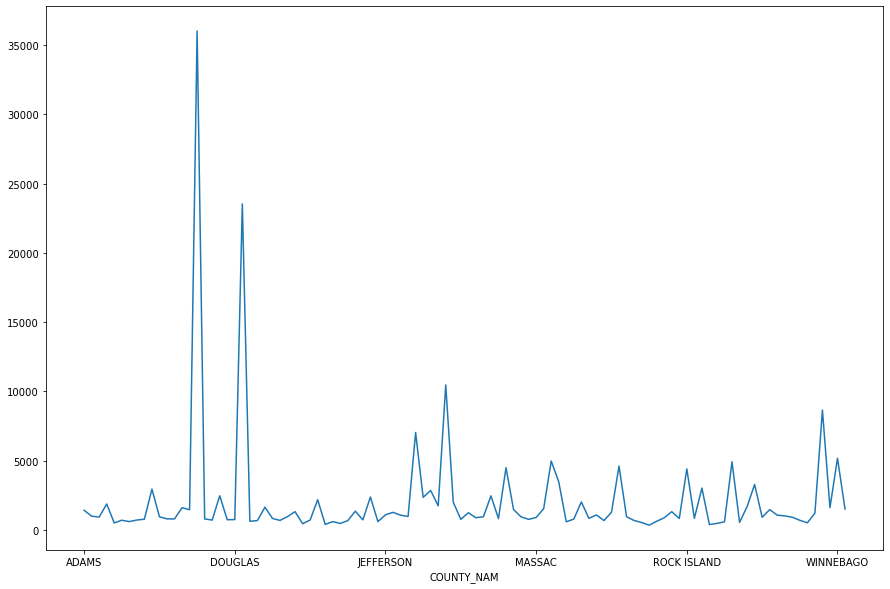

In [6]:
aggregated_data = traf_data.groupby("COUNTY_NAM")["AADT"].mean()
aggregated_data.plot(figsize=(15,10))

The sudden increase in data in 2008 seems to have some anomalies.

<AxesSubplot:title={'center':'PER YEAR SUM-AADT (2010 DATASET)'}, xlabel='AADT_YR'>

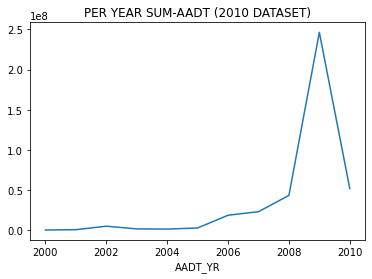

In [7]:
aggregated_data = traf_data.groupby("AADT_YR")["AADT"].sum()
aggregated_data.plot(title="PER YEAR SUM-AADT (2010 DATASET)")

Just check the position of these coordinate points. The location information is distributed in IL, and there is no abnormality.

In [ ]:
# plt.scatter(x=traf_data['POINT_X'], y=traf_data['POINT_Y'])
# plt.show()

geometry = [Point(xy) for xy in zip(traf_data['POINT_X'], traf_data['POINT_Y'])]
gdf = GeoDataFrame(geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

## Contextual visualizations

This is an interactive image from the Illinois Department of Transportation (https://www.gettingaroundillinois.com/Traffic%20Counts/index.html), we can choose the type of "traffic count"-"Truck Average Daily Traffic" and "Annual Average Daily Traffic". We can view the real-time updated road traffic information.

In [ ]:
from IPython.display import IFrame
IFrame('https://www.gettingaroundillinois.com/Traffic%20Counts/index.html', width=1000, height=700)

The data.Illinois.gov website provides the data of 2006~2009 IDOT Average Annual Daily Traffic, so these data can be compared with 2010 to find out the changes of AADT in different years. Here we select the AADT dataset in 2009 (https://data.illinois.gov/dataset/691b7386-b082-4a46-bc54-b4a0625d9a4b/resource/accd597f-e90c-4167-b5a2-2099acbaa640/download/idot_average_annual_daily_traffic_2009.csv).

Comparing the data in 2010, we found that the AADT summary information provided in 2009 is very different from that in 2010. We suspect that the data set may have been updated in 2010.

In [ ]:
traf_data_2009 = pd.read_csv("https://data.illinois.gov/dataset/691b7386-b082-4a46-bc54-b4a0625d9a4b/resource/accd597f-e90c-4167-b5a2-2099acbaa640/download/idot_average_annual_daily_traffic_2009.csv",
                       na_values={"AADT":["Not Counted"],"SU_VOL":["Not Counted"], "MU_VOL":["Not Counted"],"HCV_AADT_S":["Not Counted"]})
aggregated_data = traf_data_2009.groupby("AADTYR_STR")["AADT"].sum()
aggregated_data.plot(title="PER YEAR SUM-AADT (2009 DATASET)")

## Interactive map

We marked the location information of recording points with Annual Average Daily Traffic greater than or equal to 1000 in ADAMS County in 2008 on the map. Readers can view these location points by zooming in and dragging. Clicking on any point will display the "ROAD NAME" and "AADT" data of the current point.

In [ ]:
def position(lat,log):
    return (lat,log)

tmp = traf_data.loc[(traf_data["AADT_YR"]==2008)&(traf_data["COUNTY_NAM"]=="ADAMS")&(traf_data["AADT"]>=1000)][["AADT","ROAD_NAME","POINT_X","POINT_Y"]].reset_index()
tmp["position"] = tmp.apply(lambda x: position(x["POINT_Y"],x["POINT_X"]), axis=1)

In [ ]:
IL_map = folium.Map(location=[39.96872, -91.3958], zoom_start=12)
for index,row in tmp.iterrows():
    folium.Marker(row["position"], popup="ROAD_NAME:{0};  AADT:{1}".format(row["ROAD_NAME"],row["AADT"]),
                icon=folium.Icon(color='red')).add_to(IL_map)

In [ ]:
IL_map

##  Interactive HeatMap

We use HeatMap to display the traffic volume of Annual Average Daily Traffic in all regions in 2008. Readers can view the traffic volume of various roads and regions by zooming in and dragging.

In [ ]:
from folium.plugins import HeatMap
def heat(lat,log,den):
    return [lat,log,den]

heatdata = traf_data.loc[(traf_data["AADT_YR"]==2008)][["AADT","ROAD_NAME","POINT_X","POINT_Y"]].reset_index()
heatdata["position"] = heatdata.apply(lambda x: heat(x["POINT_Y"],x["POINT_X"],x["AADT"]), axis=1)

HeatData = []
for i in heatdata["position"].values:
    HeatData.append(i)
    
Heat_map = folium.Map([39.96872, -91.3958],zoom_start=12)
folium.plugins.HeatMap(HeatData).add_to(Heat_map)
Heat_map